In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data=pd.read_csv('diabetes1.csv')

In [28]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [29]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [30]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

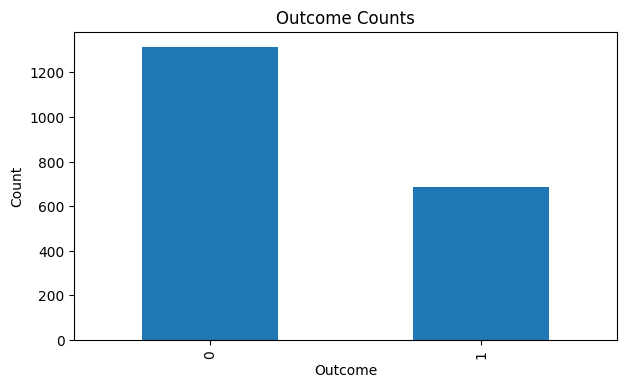

In [31]:
data['Outcome'].value_counts().plot(kind='bar',figsize=(7,4))
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Outcome Counts')
plt.show()

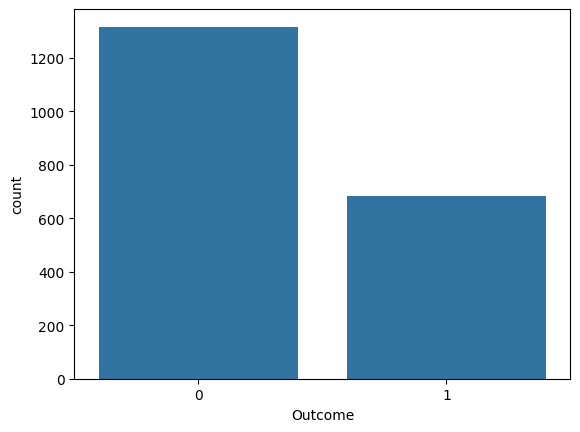

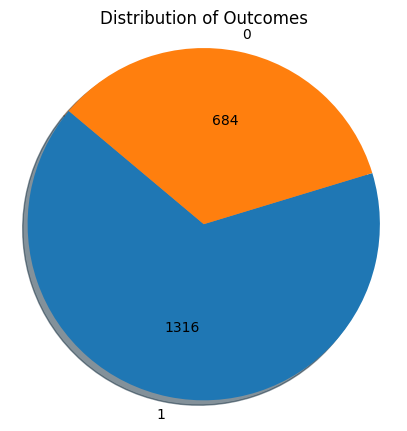

In [32]:
countplot_data = sns.countplot(x='Outcome', data=data)
total_count = len(data)
# Extract counts and categories from the countplot data
counts = [p.get_height() for p in countplot_data.patches]
categories = data['Outcome'].unique()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=categories, autopct=lambda p: f'{p * total_count / 100 :.0f}', startangle=140, shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is circular.

# Set the chart title
plt.title('Distribution of Outcomes')

# Show the pie chart
plt.show()

In [33]:
data.shape

(2000, 9)

In [34]:
data.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70,3.31,0.00,1.00,3.00,6.00,17.00
Glucose,2000.0,121.18,32.07,0.00,99.00,117.00,141.00,199.00
BloodPressure,2000.0,69.15,19.19,0.00,63.50,72.00,80.00,122.00
SkinThickness,2000.0,20.94,16.10,0.00,0.00,23.00,32.00,110.00
Insulin,2000.0,80.25,111.18,0.00,0.00,40.00,130.00,744.00
BMI,2000.0,32.19,8.15,0.00,27.38,32.30,36.80,80.60
DiabetesPedigreeFunction,2000.0,0.47,0.32,0.08,0.24,0.38,0.62,2.42
Age,2000.0,33.09,11.79,21.00,24.00,29.00,40.00,81.00
Outcome,2000.0,0.34,0.47,0.00,0.00,0.00,1.00,1.00


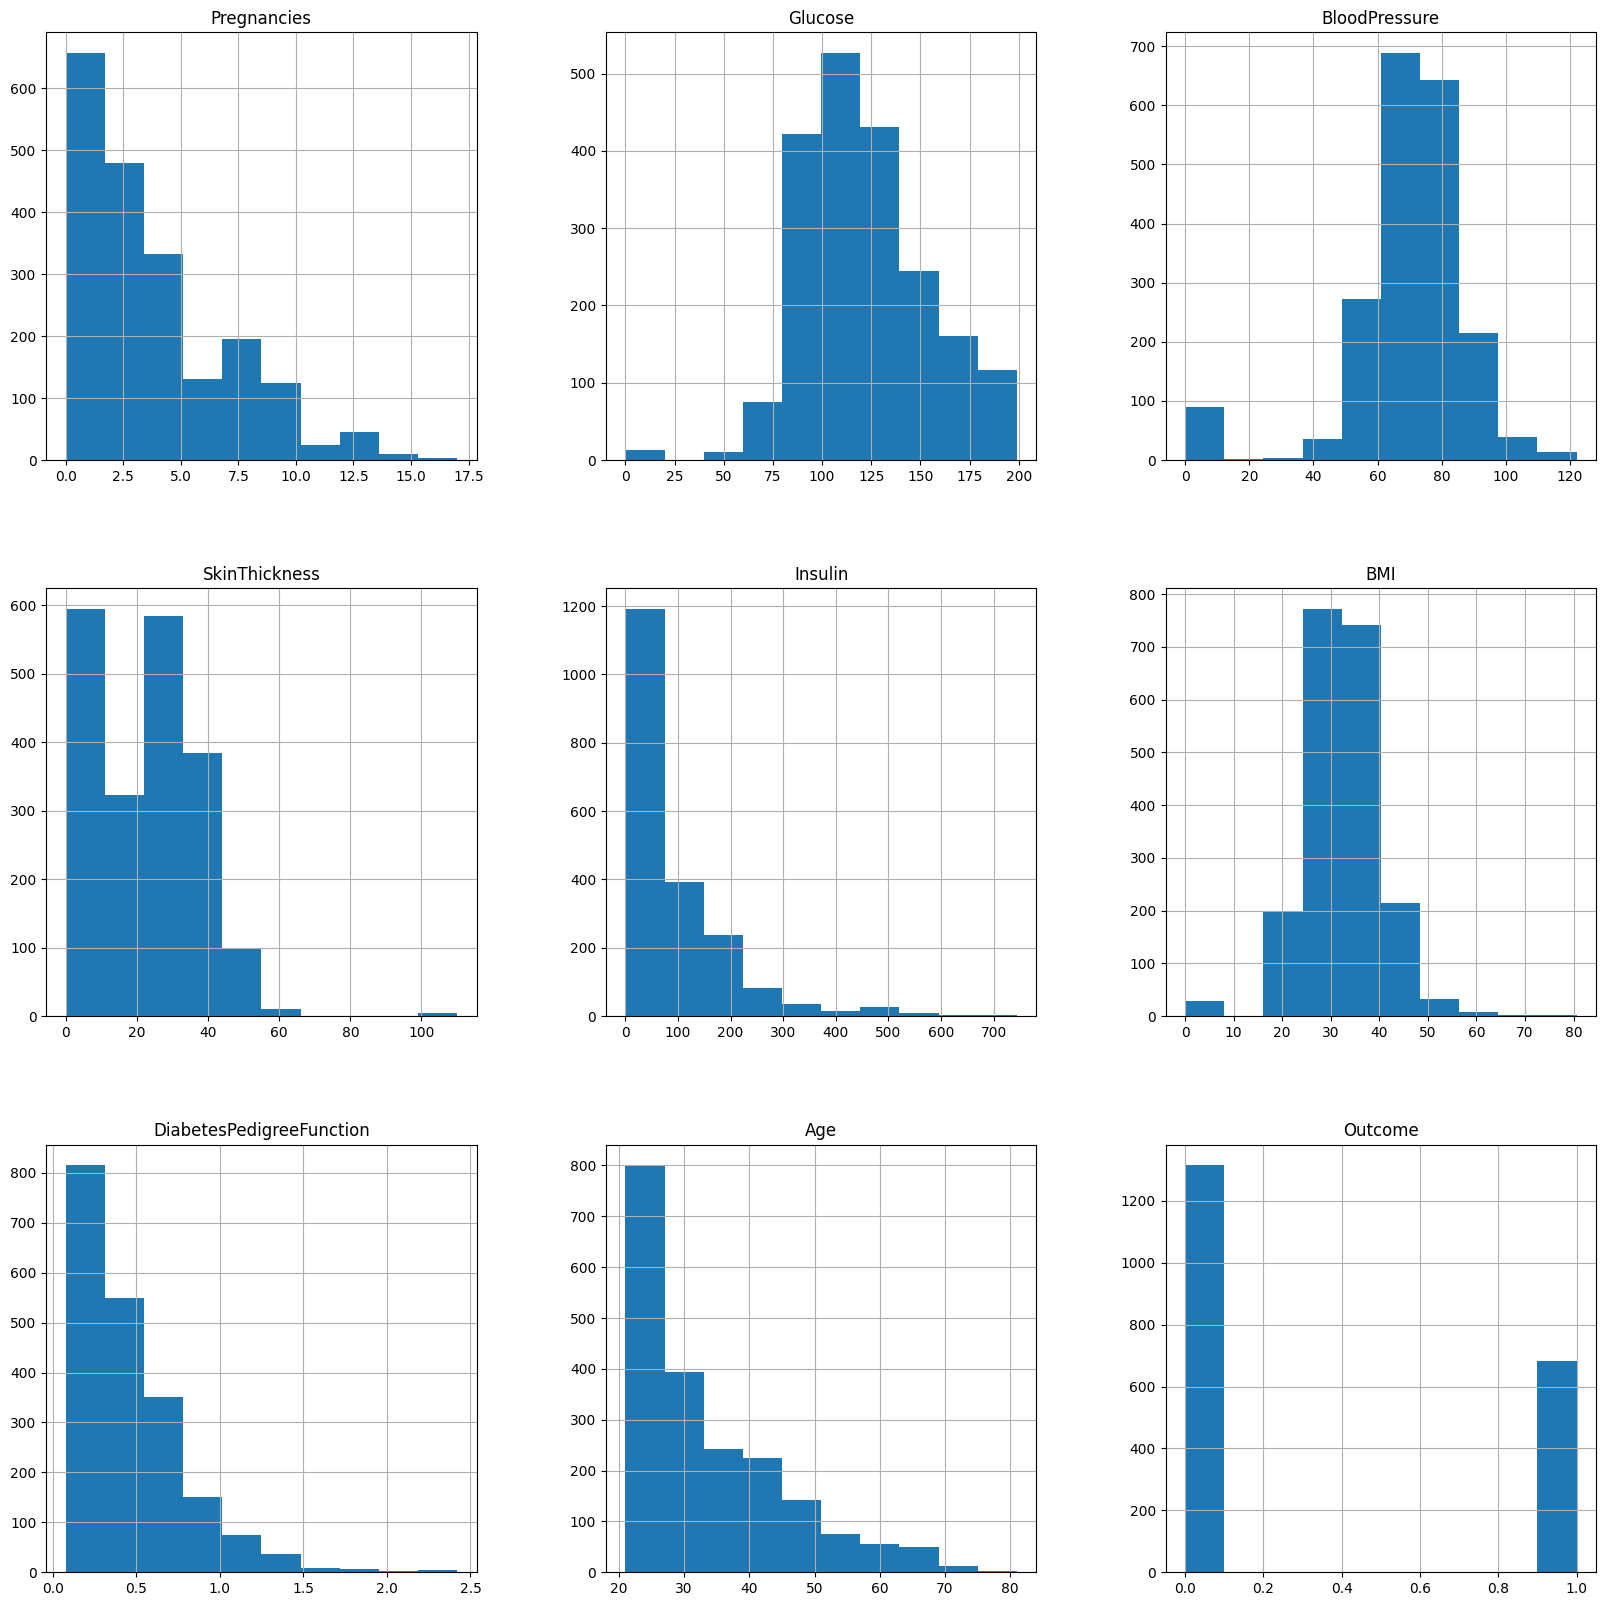

In [35]:
# Histogram of data
data.hist(figsize=(20,20))
plt.show()

In [36]:
columns_to_replace_Zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_to_replace_Zero:
    mean_value = data[data[column] != 0][column].mean()  
    data[column] = data[column].replace(0, mean_value)

In [37]:
# Data check after replaceing zero values
data.describe().transpose().round(2) #Updated values

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70,3.31,0.00,1.00,3.00,6.00,17.00
Glucose,2000.0,121.98,30.53,44.00,99.00,118.00,141.00,199.00
BloodPressure,2000.0,72.40,11.95,24.00,64.00,72.00,80.00,122.00
SkinThickness,2000.0,29.34,9.12,7.00,25.00,29.34,32.00,110.00
Insulin,2000.0,153.74,80.38,14.00,120.00,153.74,153.74,744.00
BMI,2000.0,32.65,7.19,18.20,27.60,32.40,36.80,80.60
DiabetesPedigreeFunction,2000.0,0.47,0.32,0.08,0.24,0.38,0.62,2.42
Age,2000.0,33.09,11.79,21.00,24.00,29.00,40.00,81.00
Outcome,2000.0,0.34,0.47,0.00,0.00,0.00,1.00,1.00


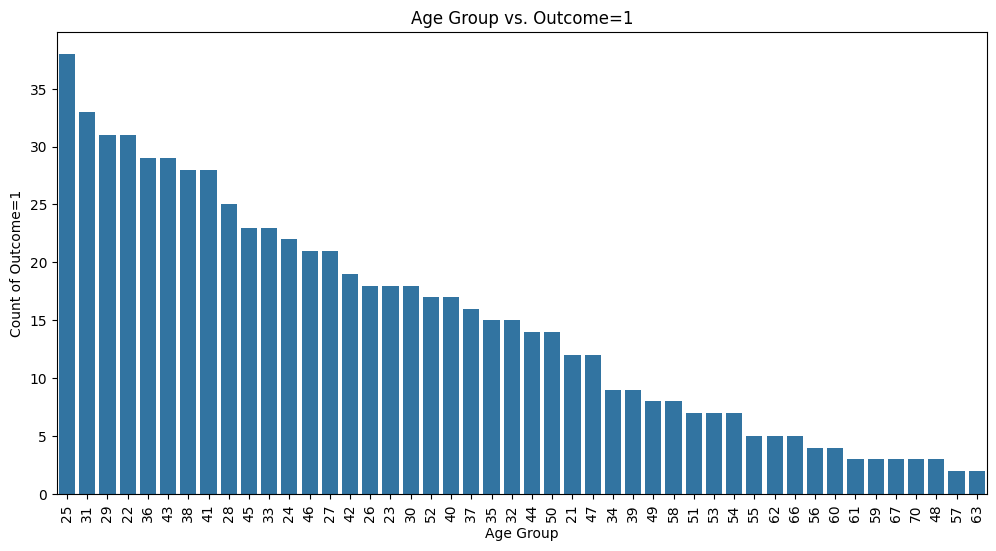

In [38]:
# Check age group with the highest number of diabetic patients
plt.figure(figsize=(12, 6))
sns.countplot(x='Age', data=data[data['Outcome'] == 1], order=data[data['Outcome'] == 1]['Age'].value_counts().index)
plt.title('Age Group vs. Outcome=1')
plt.xlabel('Age Group')
plt.ylabel('Count of Outcome=1')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [39]:
correlation_matrix = data.corr().round(2)
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.12,0.20,0.09,0.05,0.01,-0.03,0.54,0.22
Glucose,0.12,1.00,0.20,0.21,0.41,0.23,0.12,0.26,0.49
BloodPressure,0.20,0.20,1.00,0.20,0.07,0.26,0.01,0.32,0.17
SkinThickness,0.09,0.21,0.20,1.00,0.18,0.52,0.09,0.13,0.21
Insulin,0.05,0.41,0.07,0.18,1.00,0.19,0.10,0.09,0.21
BMI,0.01,0.23,0.26,0.52,0.19,1.00,0.14,0.02,0.28
DiabetesPedigreeFunction,-0.03,0.12,0.01,0.09,0.10,0.14,1.00,0.03,0.16
Age,0.54,0.26,0.32,0.13,0.09,0.02,0.03,1.00,0.24
Outcome,0.22,0.49,0.17,0.21,0.21,0.28,0.16,0.24,1.00


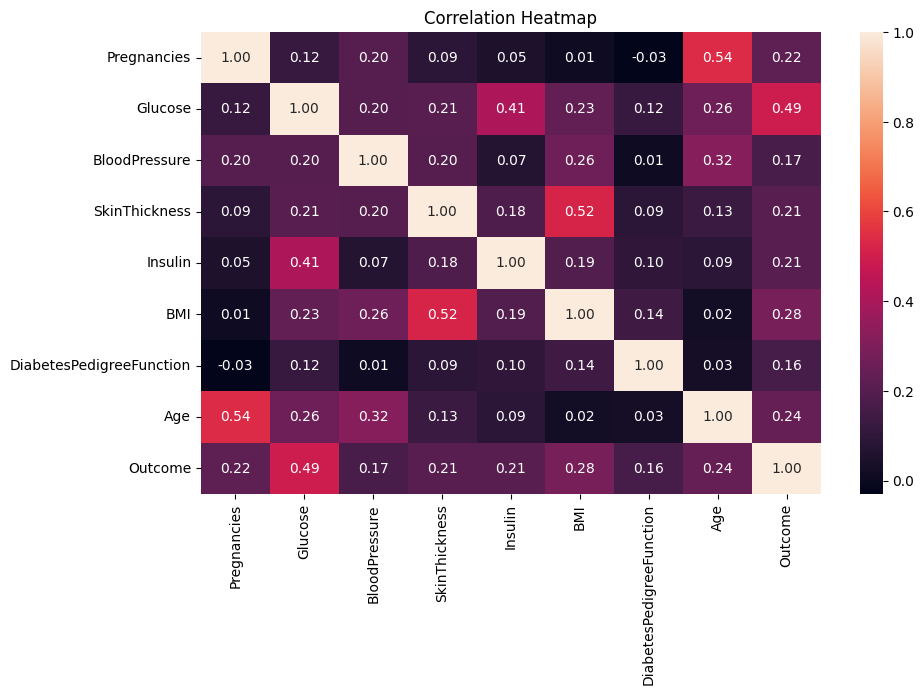

In [40]:
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<Figure size 1000x600 with 0 Axes>

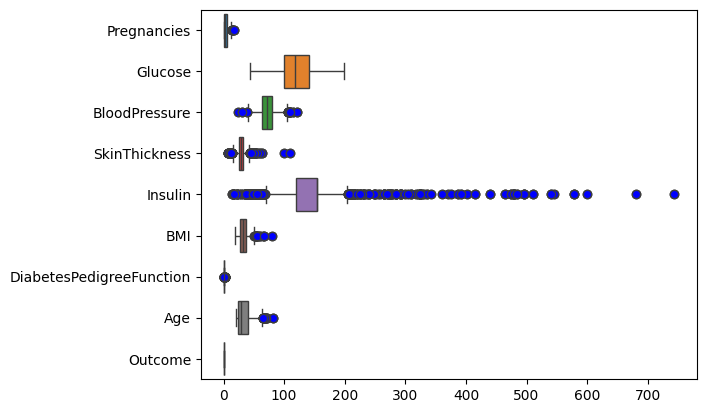

<Figure size 1000x600 with 0 Axes>

In [41]:
sns.boxplot(data, orient='h', flierprops={'markerfacecolor': 'blue', 'marker': 'o'})
plt.figure(figsize=(10,6))

In [42]:
#code buster.. 32
from sklearn.utils import resample
majority_class = data[data['Outcome'] == 0]
minority_class = data[data['Outcome'] == 1]
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=62)

In [43]:
augmented_data = pd.concat([majority_class, minority_upsampled])
data=augmented_data

In [44]:
data.shape

(2632, 9)

In [45]:
# Splitting data in features and output column.
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
y = data['Outcome'].values

In [46]:
# Scaling the input features into standardscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
#X = scaler.fit_transform(X)

In [47]:
#just checking
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=52)

In [48]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=110, random_state=42,criterion='entropy')
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=110, random_state=42)

In [49]:
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
## Predict data using test data set
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

In [50]:
train_predictions = model.predict(X_train)
train = accuracy_score(y_train, train_predictions) * 100  # Convert to percentage
test_accuracy = test_accuracy * 100  # Convert to percentage

print(f"Test Accuracy: {test_accuracy:.2f}%")
print(f"Train Accuracy: {train:.2f}%")



Test Accuracy: 99.62%
Train Accuracy: 100.00%
